In [1]:
from PIL import Image
import matplotlib.pyplot as plt

### Qn1 (a)

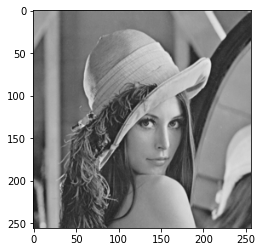

In [3]:
im = Image.open("standard_test_images/lena_gray_512.tif")
im1 = im.resize((256,256))
im1.save("reduce_lena_256.tif")
plt.imshow(im1,  cmap='gray', vmin=0, vmax=255)

### Qn1(b)

In [21]:
from math import log10, sqrt
import numpy as np
from typing import Union

def mseError(original, compressed):
    """
        `returns`: MSE error b/w reference image and converted img
    """
    msErr = np.mean((original - compressed) ** 2)
    return msErr

def PSNR(original, compressed):
    """
        `returns`: PSNR error b/w reference image and converted img
    """
    mse = mseError(original, compressed)
    if(mse == 0):          
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


In [22]:
def msePlot(reducedImg: Image, origImg: Image) -> Image:
    """
        `reducedImg`: image converted 
        `origImg`: reference Image
        `returns`: Image plot of MSE b/w two
    """
    np1 = np.asarray(reducedImg)
    np2 = np.asarray(origImg)
    n1,m1 = np1.shape
    n2, m2 = np2.shape
    if(n1 != n2 and m1 != m2): 
        raise ValueError("Dimensions must be same")
    
    mseArr = np.zeros((n1, m1))
    for i in range(n1):
        for j in range(m1):
            mseArr[i][j] = (int(np1[i][j]) - int(np2[i][j]))**2
    
    return Image.fromarray(mseArr)
    
    

MSE- 22.7532958984375
PSNR value is- 34.56036046168044
MSE plot is -


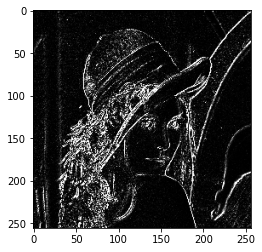

In [23]:
original = np.asarray(Image.open("standard_test_images/lena_gray_256.tif"))
compressed = np.asarray(Image.open("reduce_lena_256.tif"))
value = PSNR(original, compressed)
print("MSE-", mseError(original, compressed))
print("PSNR value is-", value)
print("MSE plot is -")
plt.imshow(msePlot(compressed, original),  cmap='gray', vmin=0, vmax=255)

### Qn1(c)
Nearest Neighbour Interpolation

In [24]:
def nnInterpolation(image, h1, w1):

    '''
         works only for upscaling
         image: np array
         h1: int new height
         w1: int new width
         
    '''
    w,h = image.shape[:2]
    xScale = h1/h
    yScale = w1/w

    scaledImage = np.zeros((w1,h1))
    # row interpolation
    for i in range(h):
        for j in range(w):
            for k in range(int(xScale)):
                scaledImage[int(i*xScale) + k][int(j*xScale)] = image[i][j]
    
    #column interpolation
    for i in range(1,w1,2):
        for j in range(h1):
            scaledImage[j][i] = scaledImage[j][i-1]
    
    return scaledImage




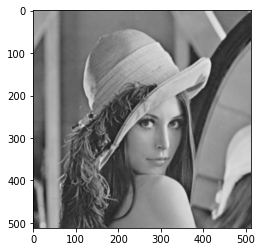

In [25]:
reconstructed = nnInterpolation(compressed, 512, 512)
NNreconstructedIm = Image.fromarray(reconstructed)
plt.imshow(NNreconstructedIm, cmap='gray', vmin=0, vmax=255)


### Qn1(c)
Bilinear Interpolation

In [26]:
from math import floor, ceil
def bilinearInterpolation(image, h1, w1):

  '''
         image: np array
         h1: int new height
         w1: int new width
  '''
  h, w = image.shape[:2]

  resized = np.zeros([h1, w1])

  xScale = h/h1 if h > 0 else 0
  yScale = w/w1 if w > 1 else 0

  for i in range(h1):
    for j in range(w1):

      xLeft = floor(xScale * j)
      yUp = floor(yScale * i)
      xRight = min(ceil(xScale * j),w-1)
      yDown = min(ceil(yScale * i), h-1)

      weightX = xScale*j - xLeft
      weightY = yScale*i - yUp

      a = image[yUp, xLeft]
      b = image[yUp, xRight]
      c = image[yDown, xLeft]
      d = image[yDown, xRight]

      pixel = a*(1 - weightX)*(1 - weightY) + b*weightX*(1 - weightY) + c*weightY*(1 - weightX) + d*weightX*weightY
      resized[i][j] = pixel

  return resized

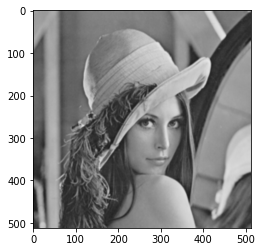

In [27]:
reconstructed = bilinearInterpolation(compressed, 512, 512)
Bilinear_reconstructedIm = Image.fromarray(reconstructed)
plt.imshow(Bilinear_reconstructedIm,  cmap='gray', vmin=0, vmax=255)

### Qn1(d)

For NN-Interpolation
MSE is 46.907864
PSNR is 31.418347070829952
MSE plot is - 


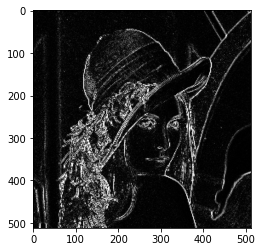

In [28]:
print("For NN-Interpolation")
print("MSE is", mseError(np.asarray(im), np.asarray(NNreconstructedIm)))
print("PSNR is", PSNR(np.asarray(im), np.asarray(NNreconstructedIm)))
print("MSE plot is - ")
plt.imshow(msePlot(NNreconstructedIm, im))

For Bilinear-Interpolation
MSE is 59.57537
PSNR is 30.38013606854358
MSE plot is - 


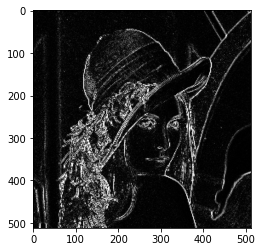

In [29]:
print("For Bilinear-Interpolation")
print("MSE is", mseError(np.asarray(im), np.asarray(Bilinear_reconstructedIm)))
print("PSNR is", PSNR(np.asarray(im), np.asarray(Bilinear_reconstructedIm)))
print("MSE plot is - ")
plt.imshow(msePlot(NNreconstructedIm, im))

### Qn2(a)

In [30]:
from PIL import ImageOps
def scaleBy2(inputImage):
    '''
        `inputImage`: type PIL.Image
        `returns`: type PIL.Image
    '''

    return ImageOps.scale(inputImage, 2)


(256, 256) (512, 512)


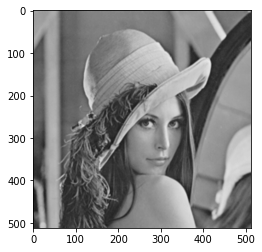

In [32]:
im = Image.open('reduce_lena_256.tif')
scaleBy2Image = scaleBy2(im)
print(im.size, scaleBy2Image.size)
plt.imshow(scaleBy2Image, cmap='gray', vmin=0, vmax= 255)

### Qn2(b)

In [33]:
def rotateBy90(inputImage: Image):
    '''
        `inputImage`: type PIL.Image
        `returns`: type PIL.Image
    '''
    return inputImage.rotate(90)

def rotateBy180(inputImage: Image):
    '''
        `inputImage`: type PIL.Image
        `returns`: type PIL.Image
    '''
    return inputImage.rotate(180)


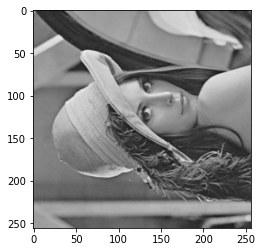

In [35]:
im = Image.open('reduce_lena_256.tif')
im90 = rotateBy90(im)
im180 = rotateBy180(im)
plt.imshow(im90, cmap='gray', vmin=0, vmax=255)


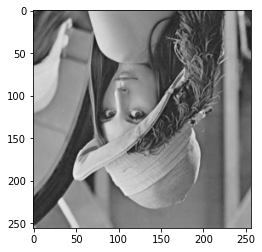

In [36]:
plt.imshow(im180, cmap='gray', vmin=0, vmax=255)

### Qn2(c)

In [37]:
def horizontalShear(inputImage, h):
    '''
        `inputImage`: type PIL.Image
        `h`: float(0,1)
        `returns`: type PIL.Image
    '''
    return inputImage.transform(inputImage.size,Image.AFFINE,(1, h, 0, 0, 1, 0))

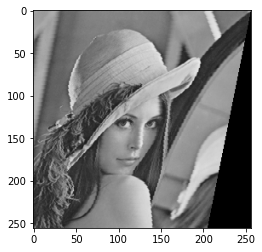

In [39]:
im = Image.open('reduce_lena_256.tif')
imShear= horizontalShear(im, 0.2)
plt.imshow(imShear, cmap='gray', vmin=0, vmax=255)

### Qn3(A) Make a Random Image with 3 connected components

In [70]:
from random import randint
DIRS = [[0,1],[0,-1],[1,0],[-1,0]]
def addComponent(im: np.array , i: int, j: int):
    """
        `image`: Input Image
        `i`: x coord of start
        `j` : y coord of start
    """

    stX , stY = i, j
    cnt = 0
    while(cnt<50):
        if(im[stX][stY]!= 255):
            im[stX][stY] = 255
            cnt += 1
        else:
            randDirection = randint(0,3)
            stX += DIRS[randDirection][0]
            stY += DIRS[randDirection][1]
    return







In [71]:
def genRandom(h,w)->Image:
    """
        `h` int : height 
        `w` int : width
        `returns`: Image
    """
    im = np.zeros((h,w))
    
    addComponent(im,30,30)
    addComponent(im,60,60)
    addComponent(im,90,90)

    im = Image.fromarray(im)
    return im


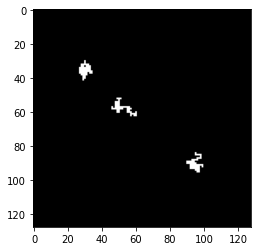

In [72]:
randomImage = genRandom(128,128)
plt.imshow(randomImage)

### Qn3 (B) Mark components using m-connectivity

In [73]:
def getParent(d: dict, label1: int) -> int: 
    """
        `returns`: equivalent class for a label
    """
    if(d.get(label1, -1) == -1):
        d[label1] = label1
        return label1
    if(d[label1] == label1):
        return label1
    return getParent(d, d[label1])



def addEquiv(d: dict, label1: int, label2: int):
    """
        Assigns two labels to same Equiv class
    """
    label1, label2 = min(label1, label2), max(label1, label2)
    parent1, _ = getParent(d, label1), getParent(d, label2)
    d[label2] = parent1


    

In [74]:
def getColorMap(d: dict)-> int:
    cnt = 0
    colorMap  = {}
    for key in d:
        if(d[key] == key):
            cnt += 1
    idx = 1  
    for key in d:
        if(d[key] == key):
            colorMap[key] = int((255/cnt)*idx)
            idx+=1

    return colorMap


In [75]:

def assignLabel(im: np.array, labels: np.array , i: int, j: int, currLabel: int, equivTable: dict):
    """
        `im`: np array of image
        `labes`: label array
        `i`: curr x idx
        `j`: curr y idx
        `currLabel`: curr max label
        `equivTable`: to take note of equivClass
        `returns`: [label, currLabels]
    """
    # if not on top row and leftmost column
    if(i>0 and j>0):
        if(im[i-1][j] == 255 and im[i][j-1] == 255):
            # if both are 1 and labels are same
            if(labels[i-1][j] == labels[i][j-1]):
                return labels[i-1][j], currLabel
            else:
                addEquiv( equivTable, labels[i-1][j], labels[i][j-1])
                return labels[i-1][j], currLabel
        # if only one is white
        elif(im[i-1][j] == 255):
            return labels[i-1][j], currLabel
        elif(im[i][j-1] == 255):
            return labels[i][j-1], currLabel
        else:
            return currLabel+1, currLabel+1

    # not on top row
    elif(i>0):
        if(im[i-1][j] == 255):
            return labels[i-1][j], currLabel
        else:
            return currLabel+1, currLabel+1

    # not on leftmost column
    elif(j>0):
        if(im[i][j-1] == 255):
            return [labels[i][j-1], currLabel]
        else:
            return currLabel+1, currLabel+1
            
    else:
        return currLabel+1, currLabel+1


In [76]:
def markConnected(im: Image) -> Image :
    im = np.asarray(im)
    h,w = im.shape
    equivTable = {}
    labels = np.zeros((h,w))
    currLabel = 0
    for i in range(h):
        for j in range(w):
            if(im[i][j] == 255):
                # print(i,j)
                labels[i][j], currLabel = assignLabel(im, labels, i, j, currLabel, equivTable)
                # print(labels[i][j], currLabel)
    
    print("Equivalence Table-",equivTable)
    # mark equiv labels as same
    for i in range(h):
        for j in range(w):
            if(labels[i][j]):
                labels[i][j] = equivTable[labels[i][j]]
    
    # assign label to a grayScale for better visibilty
    colorMap = getColorMap(equivTable)
    for i in range(h):
        for j in range(w):
            if(labels[i][j]):
                labels[i][j] = colorMap[labels[i][j]]

    return Image.fromarray(labels)


Equivalence Table- {1.0: 1.0, 2.0: 1.0, 3.0: 1.0, 4.0: 4.0, 5.0: 4.0, 6.0: 4.0, 7.0: 4.0, 8.0: 8.0, 9.0: 8.0, 10.0: 8.0, 11.0: 8.0}


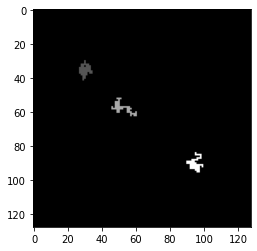

In [77]:

labelImg = markConnected(randomImage)
plt.imshow(labelImg)
